# System Description: Atom-Cavity System with External Drives and Baths

This document describes a quantum system consisting of a two-level atom interacting with a cavity field, potentially driven by external classical laser fields, and coupled to thermal baths causing dissipation and dephasing. The system parameters are highly configurable, allowing for the study of various regimes and interactions.

## 1. System Components

### 1.1. Atom

* **Energy Levels ($N_{at}$):** The atom can be either absent ($N_{at} = 0$) or a two-level system ($N_{at} = 2$) with a ground state $|g\rangle$ and an excited state $|e\rangle$.
* **Energy Separation ($\omega_{at}$):** The energy difference between the excited and ground states is $\hbar \omega_{at}$.
* **Atomic Operators:**
    * $\sigma_- = |g\rangle\langle e|$ and $\sigma_+ = |e\rangle\langle g|$ (lowering & raising operator)
    * Pauli matrices: $\sigma_x = \sigma_+ + \sigma_-$, $\sigma_y = -i (\sigma_+ - \sigma_-)$ and $\sigma_z = |e\rangle\langle e| - |g\rangle\langle g|$
    * $n_{at} = |e\rangle\langle e|$ (number operator for the excited state)

### 1.2. Cavity

* **Number of Levels ($N_{cav}$):** The cavity can be absent ($N_{cav} = 0$) or have a finite even number of energy levels ($N_{cav} > 0$).
* **Energy Separation ($\omega_{cav}$):** The energy difference between consecutive photon number states in the cavity is $\hbar \omega_{cav}$.
* **Cavity Operators:**
    * $a$ and $a^\dagger$ (annihilation & creation operator)
    * $n_{cav} = a^\dagger a$ (photon number operator)

### 1.3. Combined System Operators (if both atom and cavity are present)

The individual atomic and cavity operators are tensored with the identity operator of the other subsystem:

* $SM_{-+} = \mathbb{1}_{cav} \otimes \sigma_{-+}$
* $SI = \mathbb{1}_{cav} \otimes \sigma_I$
* $N_{at} = \mathbb{1}_{cav} \otimes n_{at}$
* $N_{cav} = n_{cav} \otimes \mathbb{1}_{at}$
* $A = a \otimes \mathbb{1}_{at}$

## 2. System Hamiltonian

The total Hamiltonian of the system can include several parts, depending on the chosen interactions:

### 2.1. Free Hamiltonian ($H_0$)

$$
H_0 = \hbar \omega_{at} \sigma_+ \sigma_- + \hbar \omega_{cav} a^\dagger a
$$

If either $N_{at} = 0$ or $N_{cav} = 0$, the corresponding term is omitted.

### 2.2. Atom-Classical Field Interaction

If the atom is driven by a classical laser field with frequency $\omega_{L,at}$ and coupling strength $g_{at}$, the interaction Hamiltonian is:

$$
H_{at-L} = -\hbar Rabi_{at} (\sigma_+ + \sigma_-) E_{real}(t)
$$

where $Rabi_{at} = \sqrt{g_{at}^2 + \delta_{at}^2}$ is the Rabi frequency, where $\delta_{at} = \omega_{at} - \omega_{L,at}$ is the detuning and $E_{real}(t) = \frac{1}{2} (e^{i \omega_{L,at} t} + e^{-i \omega_{L,at} t})$ is the real part of the laser field.

Under the Rotating Wave Approximation (RWA), this interaction simplifies to:

$$
H_{at-L}^{RWA} = -\hbar Rabi_{at} (\sigma_+ e^{-i \omega_{L,at} t} + \sigma_- e^{i \omega_{L,at} t})
$$


### 2.3. Cavity-Classical Field Interaction

Similarly, if the cavity is driven by a classical laser field with frequency $\omega_{L,cav}$ and coupling strength $g_{cav}$, the interaction Hamiltonian is:

$$
H_{cav-L} = -\hbar Rabi_{cav} (a^\dagger + a) E_{real}(t)
$$

$$
H_{cav-L}^{RWA} = -\hbar Rabi_{cav} (a^\dagger e^{-i \omega_{L,cav} t} + a e^{i \omega_{L,cav} t})
$$

### 2.4. Atom-Cavity Interaction

The interaction between the atom and the cavity field with coupling strength $g_{at\_cav}$ is described by the Jaynes-Cummings Hamiltonian:

$$
H_{at-cav}^{RWA} = \hbar Rabi_{at\_cav} (a^\dagger \sigma_- + a \sigma_+ + a^\dagger \sigma_+ + a \sigma_-) = \hbar g_{at\_cav} (a^\dagger + a)(\sigma_- + \sigma_+)
$$

If the Rotating Wave Approximation is applied , the counter-rotating terms are excluded:

$$
H_{at-cav}^{RWA} = \hbar Rabi_{at\_cav} (a^\dagger \sigma_- + a \sigma_+)
$$

This term describes the exchange of a photon between the cavity and the atom, accompanied by the atom transitioning between its energy levels.




The code uses $Rabi_{0, at\_cav} = g_{at\_cav} \sqrt{2 n_{photons\_cav} + 1} / \hbar$. The detuning is $\delta_{at\_cav} = \omega_{at} - \omega_{cav}$, and $Rabi_{at\_cav} = \sqrt{Rabi_{0, at\_cav}^2 + \delta_{at\_cav}^2}$.

## 3. Dissipation and Dephasing

The system is coupled to thermal baths at temperature $T$, leading to energy relaxation and dephasing. The strength of these interactions is characterized by the decay rates $\gamma_{relax}$ and dephasing rates $\gamma_{deph}$.

The thermal occupation number of the baths at frequency $\omega$ and temperature $T$ is given by the Bose-Einstein distribution:

$$
n_{th}(\omega, T) = \frac{1}{e^{\hbar \omega / (k_B T)} - 1}
$$

where $k_B$ is the Boltzmann constant and $T$ is the temperature.

### 3.1. Atomic Decay Channels

* **Relaxation ($\gamma_{relax\_at}$):** The atom can spontaneously decay from the excited state to the ground state, emitting energy into the bath. This is modeled by a Lindblad operator proportional to $\sigma_-$. Thermal excitation from the ground to the excited state is also included, proportional to $\sigma_+$.
* **Dephasing ($\gamma_{deph\_at}$):** Fluctuations in the environment can cause random phase shifts in the atomic superposition states without energy exchange. This is modeled by a Lindblad operator proportional to $\sigma_+ \sigma_-$.

### 3.2. Cavity Decay Channels

* **Relaxation ($\gamma_{relax\_cav}$):** Photons can leak out of the cavity into the bath. This is modeled by a Lindblad operator proportional to $a$. Thermal excitation of photons into the cavity from the bath is also included, proportional to $a^\dagger$.
* **Dephasing ($\gamma_{deph\_cav}$):** Fluctuations can also cause dephasing of the cavity field, modeled by a Lindblad operator proportional to $a^\dagger a$.

The `create_decay_ops_from_strg` function generates the appropriate Lindblad operators (collapse operators, `c_ops_list`) for the master equation or the corresponding system-bath coupling operators (`a_ops_list`) for the bloch redfield eqaution and also for a heom solver that handles baths directly.

## 4. Observables

The `e_ops_strg` parameter defines a tuple of strings indicating which expectation values of system operators should be calculated and tracked during the simulation. These include:

* Pauli matrices: * $\langle \sigma_x \rangle$ (`"sx"`), * $\langle \sigma_y \rangle$ (`"sy"`), * $\langle \sigma_z \rangle$ (`"sz"`)
* $\langle n_{at} \rangle$ (`"n_at"`)
* $\langle n_{cav} \rangle$ (`"n_cav"`)
* $\langle a + a^\dagger \rangle$ (`"a + a.dag()"`) - related to the cavity field quadrature.

The `create_e_ops_from_strg` function translates these strings into the corresponding QuTiP operators.

## 5. Rotating Wave Approximation (RWA)

The code allows for the application of the Rotating Wave Approximation to the atom-classical field, cavity-classical field, and atom-cavity interactions independently, controlled by the boolean flags `RWA_at`, `RWA_cav`, and `RWA_at_cav`, respectively. The RWA is often used when the driving frequencies are close to the system's resonance frequencies, neglecting rapidly oscillating terms that average to zero over time.

## 6. Bath Model Cutoff

The `cutoff` parameter defines the cutoff frequency of the bath model used in solvers like BRME and HEOM. 

## 7. Initial State

The initial state of the combined system is determined in the `create_decay_ops_from_strg` function based on the presence of the atom and/or cavity. For example, the atom can be initialized in the excited state (`atom_e`), a superposition state, or the ground state. The cavity can be initialized with a specific number of photons (`basis(N_cav, n)`), a coherent state (`coherent(N_cav, alpha)`), or the vacuum state. If both are present, the initial state is the tensor product of their individual initial states.

what i did in the last week:
focus one qutip_with_brmesolve

this was a testing ground for the Bloch redfield solver with qutip
-> now I know:
- take S(w) instead of J(w) to encapsulate the Temp-dependance.
- understood better the weak coupling condition (coupling parameter in the spectral density)


before the semana santa:
- build own solver -> either with eq 19 and the explicit dissipative redfield tensor
oor
- with the whole equations of motion

but nothing works

In [6]:
### IMPORTS ###
# functions from test_baths.py
from src.baths.bath_fcts import (
    spectral_density_func_ohmic,
    spectral_density_func_paper,
    spectral_density_func_drude_lorentz,
    Power_spectrum_func_paper
)
import matplotlib.pyplot as plt
from qutip import *
import numpy as np

from qutip.solver.heom import (
    DrudeLorentzBath,
    HEOMSolver,
    heomsolve,
)

# Import the outsourced plot settings
from src.visualization import mpl_tex_settings

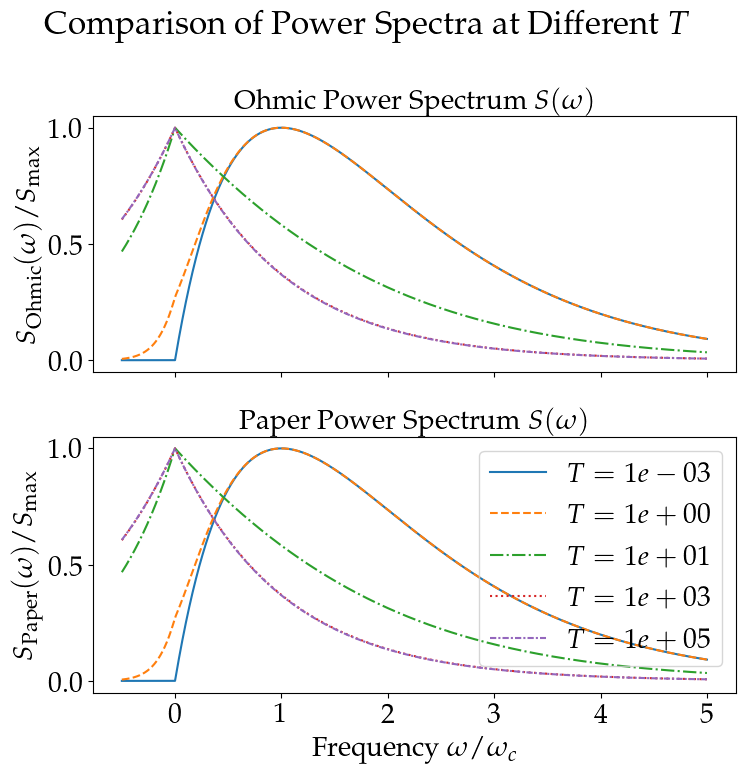

In [19]:
# =============================
# PLOT BATH MODEL FOR MULTIPLE TEMPERATURES (Stacked Subplots)
# =============================
hbar      = 1.0
Boltzmann = 1.0

def create_bath_model(alpha: float, cutoff: float, Temp: float):
    """
    Create a bath model using the given parameters.
    Returns a callable power spectrum S(w).
    """
    env = OhmicEnvironment(T=Temp, alpha=alpha, wc=cutoff, s=1.0)
    return lambda w: env.power_spectrum(w)

temperatures = [1e-3, 1, 10, 1000, 1e5]
cutoff_test  = 10
gamma_test   = 10
frequencies  = np.linspace(-0.5 * cutoff_test, 5 * cutoff_test, 10001)

fig, axs = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

# OhmicEnvironment power spectrum
for idx, T in enumerate(temperatures):
    power_spectrum = create_bath_model(gamma_test, cutoff_test, T)
    spectral_values = [power_spectrum(w) for w in frequencies]
    axs[0].plot(
        frequencies / cutoff_test,
        spectral_values / np.max(spectral_values),
        label=fr"$T = {T:.0e}$",
        linestyle=['solid', 'dashed', 'dashdot', 'dotted', (0, (3, 1, 1, 1))][idx % 5],
        color=f'C{idx}'
    )

    # Paper power spectrum
    args_paper = {
        "g": gamma_test,
        "cutoff": cutoff_test,
        "Boltzmann": Boltzmann,
        "hbar": hbar,
        "Temp": T,
    }
    spectral_values = Power_spectrum_func_paper(frequencies, args_paper)
    axs[1].plot(
        frequencies / cutoff_test,
        spectral_values / np.max(spectral_values),
        label=fr"$T = {T:.0e}$",
        linestyle=['solid', 'dashed', 'dashdot', 'dotted', (0, (3, 1, 1, 1))][idx % 5],
        color=f'C{idx}'
    )
axs[0].set_ylabel(r"$S_{\mathrm{Ohmic}}(\omega) / S_{\max}$")
axs[0].set_title(r"Ohmic Power Spectrum $S(\omega)$")

axs[1].set_xlabel(r"Frequency $\omega / \omega_c$")
axs[1].set_ylabel(r"$S_{\mathrm{Paper}}(\omega) / S_{\max}$")
axs[1].set_title(r"Paper Power Spectrum $S(\omega)$")
axs[1].legend(loc='upper right')

fig.suptitle(r"Comparison of Power Spectra at Different $T$")
plt.tight_layout()
plt.show()

In [23]:
# =============================
# SYSTEM CONFIGURATION CLASS
# =============================
from dataclasses import dataclass
from typing import Optional, Tuple, List

@dataclass
class SystemConfig:
    """Configuration class for atom-cavity system parameters."""
    
    # Physical constants
    hbar: float = 1.0
    Boltzmann: float = 1.0
    
    Temp: float = 1e0
    
    # System dimensions
    N_at: int = 2
    N_cav: int = 0
    
    # Frequencies
    omega_at: float = 1 * 2 * np.pi
    omega_cav_factor: float = 1.0  # multiplier for omega_at
    omega_L_at_factor: float = 1.0
    omega_L_cav_factor: float = 0.0
    
    # Initial conditions
    n_photons_cav: int = 0
    
    # Coupling strengths
    g_at: float = 0.0
    g_cav: float = 0.0
    g_at_cav_factor: float = 1e-1  # multiplier for omega_at
    
    # RWA flags
    RWA_at: bool = False
    RWA_cav: bool = False
    RWA_at_cav: bool = False
    
    # Bath parameters
    gamma_deph_at: float = 1e-3
    gamma_relax_at: float = 1e-2
    gamma_deph_cav: float = 1e-3
    gamma_relax_cav: float = 1e-3
    cutoff_factor: float = 1e1  # multiplier for omega_at
    
    # Active channels
    decay_channels: Tuple[str, ...] = (
        "Deph_at" if N_at != 0 else "",  # Dephasing for the atom
        # "Relax_at" if N_at != 0 else "",  # Relaxation for the atom
        # "Relax_cav" if N_cav != 0 else "",  # Relaxation for the cavity
        # "Deph_cav" if N_cav != 0 else "",  # Dephasing for the cavity, usefull?
        )

    observables: Tuple[str, ...] = (
        # atomic observables
        "sx", 
        # "sy" if N_at != 0 else "",
        # "sz" if N_at != 0 else "",
        "n_at", 
        # cavity observables
        "n_cav" if N_cav != 0 else "",
        # "a + a.dag()"if N_cav != 0 else "",
    )
    
    @property
    def omega_cav(self) -> float:
        return self.omega_cav_factor * self.omega_at if self.N_cav != 0 else 0.0
    
    @property
    def omega_L_at(self) -> float:
        return self.omega_L_at_factor * self.omega_at
    
    @property
    def omega_L_cav(self) -> float:
        return self.omega_L_cav_factor * self.omega_cav
    
    @property
    def g_at_cav(self) -> float:
        if self.N_at != 0 and self.N_cav != 0:
            return self.g_at_cav_factor * self.omega_at
        return 0.0
    
    @property
    def cutoff(self) -> float:
        return self.cutoff_factor * self.omega_at
    
    @property
    def w_th(self) -> float:
        return self.Boltzmann * self.Temp / self.hbar

# =============================
# OPERATOR FACTORY CLASS
# =============================
class OperatorFactory:
    """Factory class for creating quantum operators based on system configuration."""
    
    def __init__(self, config: SystemConfig):
        self.config = config
        self._atomic_ops = {}
        self._cavity_ops = {}
        self._combined_ops = {}
        self._build_operators()
    
    def _build_atomic_operators(self) -> None:
        """Build atomic operators if atom is present."""
        if self.config.N_at == 0:
            return
            
        # Basic atomic states
        atom_g = basis(self.config.N_at, 0)
        atom_e = basis(self.config.N_at, 1)
        
        # Store operators
        self._atomic_ops.update({
            'ground': atom_g,
            'excited': atom_e,
            'sm': atom_g * atom_e.dag(),
            'sx': (atom_g * atom_e.dag() + atom_e * atom_g.dag()),
            'sy': -1j * (atom_e * atom_g.dag() - atom_g * atom_e.dag()),
            'sz': atom_e * atom_e.dag() - atom_g * atom_g.dag(),
            'n_at': ket2dm(atom_e)
        })
    
    def _build_cavity_operators(self) -> None:
        """Build cavity operators if cavity is present."""
        if self.config.N_cav == 0:
            return
            
        a_op = destroy(self.config.N_cav)
        self._cavity_ops.update({
            'a': a_op,
            'n_cav': a_op.dag() * a_op
        })
    
    def _build_combined_operators(self) -> None:
        """Build operators for the combined Hilbert space."""
        if self.config.N_at != 0 and self.config.N_cav != 0:
            # Both systems present
            self._build_tensor_operators()
        elif self.config.N_at != 0:
            # Only atom present
            self._combined_ops = self._atomic_ops.copy()
        elif self.config.N_cav != 0:
            # Only cavity present
            self._combined_ops = self._cavity_ops.copy()
    
    def _build_tensor_operators(self) -> None:
        """Build tensor product operators for atom-cavity system."""
        N_at, N_cav = self.config.N_at, self.config.N_cav
        
        # Atomic operators in combined space
        for name, op in self._atomic_ops.items():
            if name not in ['ground', 'excited']:  # Skip state vectors
                self._combined_ops[name.upper()] = tensor(qeye(N_cav), op)
        
        # Cavity operators in combined space
        for name, op in self._cavity_ops.items():
            op_name = 'A' if name == 'a' else name.upper()
            self._combined_ops[op_name] = tensor(op, qeye(N_at))
    
    def _build_operators(self) -> None:
        """Build all operators for the system."""
        self._build_atomic_operators()
        self._build_cavity_operators()
        self._build_combined_operators()
    
    def get_operator(self, name: str) -> Optional[Qobj]:
        """Get an operator by name."""
        return self._combined_ops.get(name)
    
    def get_initial_state(self) -> Qobj:
        """Create initial state based on system configuration."""
        if self.config.N_at != 0 and self.config.N_cav != 0:
            psi_at = self._atomic_ops['excited']
            psi_cav = coherent(self.config.N_cav, alpha=0)
            return tensor(psi_cav, psi_at)
        elif self.config.N_at != 0:
            return self._atomic_ops['excited']
        elif self.config.N_cav != 0:
            return coherent(self.config.N_cav, alpha=0)
        else:
            raise ValueError("At least one subsystem must be present")

# =============================
# HAMILTONIAN BUILDER CLASS
# =============================
class HamiltonianBuilder:
    """Class for building system Hamiltonians."""
    
    def __init__(self, config: SystemConfig, operators: OperatorFactory):
        self.config = config
        self.ops = operators
    
    def build_free_hamiltonian(self) -> Qobj:
        """Build the free (non-interacting) Hamiltonian."""
        H_free = 0
        
        if self.config.N_at != 0:
            sm_op = self.ops.get_operator('SM')
            H_free += self.config.hbar * self.config.omega_at * sm_op.dag() * sm_op
        
        if self.config.N_cav != 0:
            a_op = self.ops.get_operator('A')
            H_free += self.config.hbar * self.config.omega_cav * a_op.dag() * a_op
        
        return H_free
    
    def build_interaction_terms(self) -> List:
        """Build interaction terms for time-dependent Hamiltonian."""
        H_terms = []
        
        # Atom-classical field interaction
        if self.config.g_at != 0 and self.config.N_at != 0:
            H_terms.extend(self._atom_laser_interaction())
        
        # Cavity-classical field interaction
        if self.config.g_cav != 0 and self.config.N_cav != 0:
            H_terms.extend(self._cavity_laser_interaction())
        
        # Atom-cavity interaction
        if self.config.g_at_cav != 0 and self.config.N_at != 0 and self.config.N_cav != 0:
            H_terms.extend(self._atom_cavity_interaction())
        
        return H_terms
    
    def _atom_laser_interaction(self) -> List:
        """Build atom-laser interaction terms."""
        # Implementation details for atom-laser coupling
        # This is a placeholder - implement based on your specific needs
        return []
    
    def _cavity_laser_interaction(self) -> List:
        """Build cavity-laser interaction terms."""
        # Implementation details for cavity-laser coupling
        return []
    
    def _atom_cavity_interaction(self) -> List:
        """Build atom-cavity interaction terms."""
        sm_op = self.ops.get_operator('SM')
        a_op = self.ops.get_operator('A')
        
        if self.config.RWA_at_cav:
            # Jaynes-Cummings model (RWA)
            g_eff = self.config.hbar * self.config.g_at_cav
            return [
                [a_op * sm_op.dag(), -g_eff],
                [a_op.dag() * sm_op, -g_eff]
            ]
        else:
            # Non-RWA interaction
            g_eff = self.config.hbar * self.config.g_at_cav
            return [[(a_op + a_op.dag()) * (sm_op + sm_op.dag()), -g_eff]]

# =============================
# USAGE EXAMPLE
# =============================
def create_system(config_updates: dict = None) -> Tuple[SystemConfig, OperatorFactory, Qobj]:
    """
    Create a complete quantum system with given configuration.
    
    Parameters:
    -----------
    config_updates : dict, optional
        Dictionary of configuration parameters to update
    
    Returns:
    --------
    config : SystemConfig
        System configuration
    operators : OperatorFactory
        Operator factory with all system operators
    hamiltonian : Qobj or QobjEvo
        System Hamiltonian
    """
    # Create configuration
    config = SystemConfig()
    if config_updates:
        for key, value in config_updates.items():
            if hasattr(config, key):
                setattr(config, key, value)
    
    # Create operators
    operators = OperatorFactory(config)
    
    # Build Hamiltonian
    builder = HamiltonianBuilder(config, operators)
    H_free = builder.build_free_hamiltonian()
    H_interactions = builder.build_interaction_terms()
    
    if H_interactions:
        hamiltonian = QobjEvo([H_free] + H_interactions)
    else:
        hamiltonian = H_free
    
    return config, operators, hamiltonian

# =============================
# EXAMPLE USAGE
# =============================
if __name__ == "__main__":
    # Create system with default parameters
    config, ops, H = create_system()
    
    # Or with custom parameters
    custom_config = {
        'N_at': 1,
        'N_cav': 0,
        'g_at_cav_factor': 0.1,
        'RWA_at_cav': True,
        'decay_channels': ("Deph_at", "Relax_at"),
        'observables': ("sx", "sz", "n_at", "n_cav")
    }
    config, ops, H = create_system(custom_config)
    
    # Get initial state
    psi_ini = ops.get_initial_state()
    
    # Get specific operators
    sx_op = ops.get_operator('SX')
    n_at_op = ops.get_operator('N_AT')

AttributeError: 'NoneType' object has no attribute 'dag'

In [39]:
x = OperatorFactory
x._build_atomic_operators

<function __main__.OperatorFactory._build_atomic_operators(self) -> None>

In [ ]:
# =============================
# SYSTEM PARAMETERS     (**changeable**) 
# =============================
omega_at = 1 * 2 * np.pi  # energy separation of the atomic states
N_at    = 2              # 0 lvls = atom is not present or 2 lvls = atom is present
N_cav   = 0              # 0 = no cavity present or even = cavity with N_cav levels
Temp    = 1e0           # Temperature of the baths
w_th    = Boltzmann * Temp / hbar

omega_cav  = 1* omega_at if N_cav != 0 else 0  # cavity energy separation
omega_L_at = 1 * omega_at
omega_L_cav = 0#0.99 * omega_cav
n_photons_cav = 0  # Initial number of photons in the cavity

###  COUPLINGS 
g_at       = 0#1e-1 * omega_at if N_at != 0  else 0                 # coupling strength between classical laser and atom (mu_a * E0)    
g_cav       = 0#1e-3 * omega_cav if N_cav != 0  else 0              # coupling strength between classical laser and cavity  ("mu_cav" * E0)
g_at_cav   = 1e-1 * omega_at if N_at != 0 and N_cav != 0  else 0    # coupling strength between cavity and atom (mu_cav * )

RWA_at     = False # between atom and cavity
RWA_cav     = False # between atom and cavity
RWA_at_cav = False # between atom and cavity


### Coupling to the bath
gamma_deph_at, gamma_relax_at   = 1e-3 , 1e-2   # dim.less Dephasing and decay rates for the atom
gamma_deph_cav, gamma_relax_cav = 1e-3 , 1e-3   # dim.less Dephasing and decay rates for the cavity
cutoff = 1e1 * omega_at # Adjust the cutoff frequency of the bath model based on the atomic frequency

# =============================
# DEFINE ATOMIC / CAVITY DECAY CHANNELS and observables to keep track of
# =============================
decay_ops_strg = ( # which decay channels are present
#    "Relax_at" if N_at != 0 else "",  # Relaxation for the atom
#    "Relax_cav" if N_cav != 0 else "",  # Relaxation for the cavity
    "Deph_at" if N_at != 0 else "",  # Dephasing for the atom
###    "Deph_cav" if N_cav != 0 else "",  # Dephasing for the cavity, usefull?
)

e_ops_strg = ( # which observables to keep track of
    # atomic observables
    "sx" if N_at != 0 else "",
#    "sy" if N_at != 0 else "",
#    "sz" if N_at != 0 else "",
    "n_at" if N_at != 0 else "",
    
    # cavity observables
    "n_cav" if N_cav != 0 else "",
#    "a + a.dag()"if N_cav != 0 else "",
)


# =============================
# DEFINE ATOMIC / CAVITY STATES AND OPERATORS
# =============================
# atom
if N_at != 0:
    atom_g, atom_e = basis(N_at, 0), basis(N_at, 1)  # Ground, Excited states

    sm_op   = atom_g * atom_e.dag()

    sx_op   = (sm_op + sm_op.dag())  # sigmaX operator
    sy_op   = -1j * (atom_e * atom_g.dag() - atom_g * atom_e.dag())  # sigmaY operator
    sz_op   = atom_e * atom_e.dag() - atom_g * atom_g.dag()  # sigmaZ operator
    n_at_op = ket2dm(atom_e)  # number operator for the atom
# Cavity
if N_cav != 0:
    a_op      = destroy(N_cav)  # cavity annihilation operator
    n_cav_op  = a_op.dag() * a_op  # number operator for the cavity

if N_at != 0 and N_cav != 0:
    # Combined operators
    A_op      = tensor(a_op, qeye(N_at)) if N_at != 0 else a_op
    SM_op     = tensor(qeye(N_cav), sm_op) if N_at != 0 else None
    SX_op     = tensor(qeye(N_cav), sx_op) if N_at != 0 else None
    SY_op     = tensor(qeye(N_cav), sy_op) if N_at != 0 else None
    SZ_op     = tensor(qeye(N_cav), sz_op) if N_at != 0 else None

    N_at_op   = tensor(qeye(N_cav), n_at_op) if N_at != 0 else None
    N_cav_op  = tensor(n_cav_op, qeye(N_at)) if N_at != 0 else n_cav_op
elif N_cav != 0 and N_at == 0:
    SM_op = SX_op = SY_op = SZ_op = N_at_op = None

    A_op = a_op
    N_cav_op = n_cav_op
elif N_at != 0 and N_cav == 0:
    N_cav_op = A_op = None
    
    SM_op = sm_op
    SX_op = sx_op
    SY_op = sy_op
    SZ_op = sz_op
    N_at_op = n_at_op


def Hamilton(omega_at, omega_cav, N_cav, N_at):
    H_at  = 0
    H_cav = 0

    if N_at != 0:
        H_at += hbar * omega_at * SM_op.dag() * SM_op  # atom energy separation

    if N_cav != 0:
        H_cav += hbar * omega_cav * A_op.dag() * A_op  # cavity energy separation

    H0 = H_at + H_cav  # no interactions
    return H0





def create_decay_ops_from_strg(strg):
    # initial state
    if N_at != 0:
        psi_ini_at = atom_e   # to see relaxation
        # psi_ini_at = (atom_e + atom_g).unit()  # |+> = (|0> + |1>)/sqrt(2) to see dephasing
    if N_cav != 0:
        # psi_ini_cav = basis(N_cav, 1) # initially one PHOTON present
        # psi_ini_cav = (basis(N_cav, N_cav-1) + basis(N_cav, 0)).unit() # Dephasing
        # psi_ini_cav = basis(N_cav, 0) # no photon in the cavity
        psi_ini_cav = coherent(N_cav, alpha=0) # to model classical laser best
        
    # for me and brme solver:
    a_ops_list = []
    c_ops_list = []

    # for the HEOM solver:
    Nk          = 4
    terminators = []
    envs        = []

    # unpack the decay_op string
    global n_th_at, n_th_cav
    n_th_at = n_thermal(omega_at, w_th)
    n_th_cav = n_thermal(omega_cav, w_th)

    if "Relax_at" in strg:
        a_ops_list.append([
            SM_op + SM_op.dag(), 
            create_bath_model(gamma_relax_at, cutoff, Temp)
            ]  # Relaxation operator
        )
        
        c_ops_list.append([
            SM_op.dag() * np.sqrt(gamma_relax_at * n_th_at),       # Collapse operator for thermal excitation
            SM_op       * np.sqrt(gamma_relax_at * (n_th_at) + 1)  # Collapse operator for spontaneous and thermal relaxation
            ]
        )
        
        
    if "Deph_at" in strg:
        a_ops_list.append([
            (SM_op.dag() * SM_op), 
            create_bath_model(gamma_deph_at, cutoff, Temp)
            ]  # Dephasing operator
        )
        c_ops_list.append(
            np.sqrt(gamma_deph_at * (2 * n_th_at + 1)) * (SM_op.dag() * SM_op)  # Collapse operator for dephasing
        )


    if "Relax_cav" in strg:
        a_ops_list.append([
        (A_op + A_op.dag()),
            create_bath_model(gamma_relax_cav, cutoff, Temp)
            ]
        )
  
        c_ops_list.append([
            A_op       * np.sqrt(gamma_relax_cav * (n_th_cav + 1)),
            A_op.dag() * np.sqrt(gamma_relax_cav * (n_th_cav)),
            ]
        )

    if "Deph_cav" in strg:
        a_ops_list.append([
            (A_op.dag() * A_op), 
            create_bath_model(gamma_deph_cav, cutoff, Temp)
            ]  # Dephasing operator
        )
        c_ops_list.append(
            np.sqrt(gamma_deph_cav * (2 * n_th_cav + 1)) * (A_op.dag() * A_op)  # Collapse operator for dephasing
        )

    if N_at != 0 and N_cav != 0:
        psi_ini = tensor(psi_ini_cav, psi_ini_at) if N_cav != 0 else psi_ini_at
    elif N_at != 0 and N_cav == 0:
        psi_ini = psi_ini_at
    elif N_cav != 0 and N_at == 0:
        psi_ini = psi_ini_cav

    return a_ops_list, c_ops_list, (envs, terminators), psi_ini


def create_e_ops_from_strg(strg):
    e_ops_list = []
    e_ops_labels = []
    if "sx" in strg:
        e_ops_list.append(
            SX_op
        )
        e_ops_labels.append(
            r"$ \langle s_x \rangle $ "
        )

    if "sy" in strg:
        e_ops_list.append(
            SY_op
        )
        e_ops_labels.append(
            r"$ \langle s_y \rangle $ "
        )

    if "sz" in strg:
        e_ops_list.append(
            SZ_op
        )
        e_ops_labels.append(
            r"$ \langle s_z \rangle $ "
        )

    if "n_at" in strg:
        e_ops_list.append(
            N_at_op
        )
        e_ops_labels.append(
            r"$ \langle n_{\text{at}} \rangle $ "
        )
    if "n_cav" in strg:
        e_ops_list.append(
            N_cav_op
        )
        e_ops_labels.append(
            r"$ \langle n_{\text{cav}} \rangle $ "
        )
    if "a + a.dag()" in strg:
        e_ops_list.append(
            A_op + A_op.dag()
        )
        e_ops_labels.append(
            r"$ \langle A+A^\dagger \rangle $ "
        )

    return e_ops_list, e_ops_labels

H0 = Hamilton(omega_at, omega_cav, N_cav, N_at)

H_total = [
    H0,
]


### Add interactions / drives

# atom with classical field
if g_at != 0 and N_at != 0:
    global delta_at, Rabi_0_at, Rabi_at
    delta_at = omega_at - omega_L_at
    Rabi_0_at = g_at / hbar
    Rabi_at = np.sqrt(Rabi_0_at**2 + delta_at**2)

    # classical field
    def Efield(t):
        return np.exp(1j * omega_L_at * t) / 2 
    def Efield_conj(t):
        return np.exp(-1j * omega_L_at * t) / 2
    def Efield_real(t):
        return Efield(t) + Efield_conj(t)

    # interaction with a classical field
    if RWA_at:
        H_total.append([- hbar * Rabi_at * SM_op.dag(), Efield])
        H_total.append([- hbar * Rabi_at * SM_op, Efield_conj])
    else:
        H_total.append([- hbar * Rabi_at * (SM_op + SM_op.dag()), Efield_real])


# cav with classical field
if g_cav != 0 and N_cav != 0:
    global delta_cav, Rabi_0_cav, Rabi_cav
    delta_cav = omega_at - omega_L_cav
    Rabi_0_cav = g_cav / hbar
    Rabi_cav = np.sqrt(Rabi_0_cav**2 + delta_cav**2)

    # classical field
    def Efield(t):
        return np.exp(1j * omega_L_at * t) / 2 
    def Efield_conj(t):
        return np.exp(-1j * omega_L_at * t) / 2
    def Efield_real(t):
        return Efield(t) + Efield_conj(t)
    
    # interaction with a classical field
    if RWA_cav:
        H_total.append([- hbar * Rabi_cav * A_op.dag(), Efield])
        H_total.append([- hbar * Rabi_cav * A_op, Efield_conj])
    else:
        H_total.append([- hbar * Rabi_cav * (A_op + A_op.dag()), Efield_real])

# coupling to the cavity
if g_at_cav != 0 and N_cav != 0 and N_at != 0:
    # Rabi calculations
    global delta_at_cav, Rabi_0_at_cav, Rabi_at_cav
    delta_at_cav = omega_at - omega_cav
    Rabi_0_at_cav = g_at_cav * np.sqrt(2 * n_photons_cav + 1) / hbar # TODO! woher kommt das?
    Rabi_at_cav = np.sqrt(Rabi_0_at_cav**2 + delta_at_cav**2)

#    def Efield(t):
#        return np.exp(1j * omega_cav * t) / 2
#    def Efield_conj(t):
#        return np.exp(-1j * omega_cav * t) / 2
#    def Efield_real(t):
#        return Efield(t) + Efield_conj(t)

    # interaction of the cavity with the atom
    if RWA_at_cav:
        H_total.append([A_op * SM_op.dag(), - hbar * Rabi_at_cav])
        H_total.append([A_op.dag() * SM_op, - hbar * Rabi_at_cav])

        #H_total.append([- hbar * Rabi_0_at_cav * A_op * SM_op.dag(), Efield])
        #H_total.append([- hbar * Rabi_0_at_cav * A_op.dag() * SM_op, Efield_conj])

    else:
        H_total.append([(A_op + A_op.dag()) * (SM_op + SM_op.dag()), - hbar * Rabi_at_cav])
        
        #H_total.append([- hbar * Rabi_0_at_cav * (A_op + A_op.dag()) * (SM_op + SM_op.dag()), Efield_real])

a_ops_list, c_ops_list, (envs, terminators), psi_ini = create_decay_ops_from_strg(decay_ops_strg)
e_ops_list, e_ops_labels = create_e_ops_from_strg(e_ops_strg)

#print(a_ops_list, c_ops_list)
print(H_total)
H_total = QobjEvo(H_total)
print(H_total)
#H0

"""times_test = np.linspace(0, 1, 100)
H_values = [H_total(t) for t in times_test]
# Specify the matrix element you want to track (row, column)
row_index = 0
col_index = 3

# Extract the chosen matrix element for each time point
matrix_element_values = [H.data.to_array()[row_index, col_index] for H in H_values]

# Plot the real and imaginary parts
plt.figure(figsize=(10, 6))
plt.plot(times_test, np.real(matrix_element_values), label=f"Re($H_{{{row_index},{col_index}}}$)")
plt.plot(times_test, np.imag(matrix_element_values), label=f"Im($H_{{{row_index},{col_index}}}$)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title(f"Time Evolution of $H_{{{row_index},{col_index}}}$ Matrix Element")
plt.legend()
plt.grid(True)
plt.show()"""

[Quantum object: dims=[[5, 2], [5, 2]], shape=(10, 10), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          6.28318531  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          6.28318531  0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.         12.56637061  0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         12.56637061  0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         18.84955592
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  18.84955592  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
 

'times_test = np.linspace(0, 1, 100)\nH_values = [H_total(t) for t in times_test]\n# Specify the matrix element you want to track (row, column)\nrow_index = 0\ncol_index = 3\n\n# Extract the chosen matrix element for each time point\nmatrix_element_values = [H.data.to_array()[row_index, col_index] for H in H_values]\n\n# Plot the real and imaginary parts\nplt.figure(figsize=(10, 6))\nplt.plot(times_test, np.real(matrix_element_values), label=f"Re($H_{{{row_index},{col_index}}}$)")\nplt.plot(times_test, np.imag(matrix_element_values), label=f"Im($H_{{{row_index},{col_index}}}$)")\nplt.xlabel("Time")\nplt.ylabel("Value")\nplt.title(f"Time Evolution of $H_{{{row_index},{col_index}}}$ Matrix Element")\nplt.legend()\nplt.grid(True)\nplt.show()'

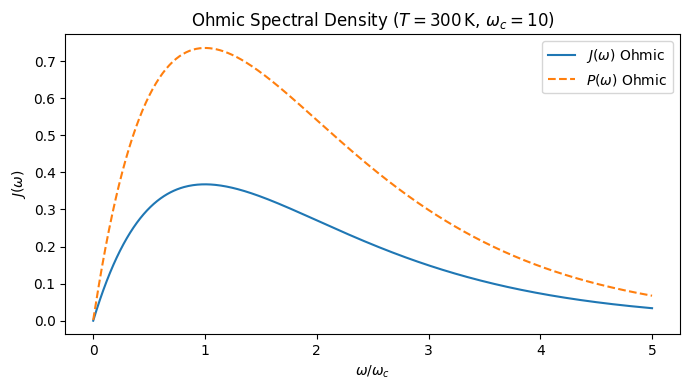

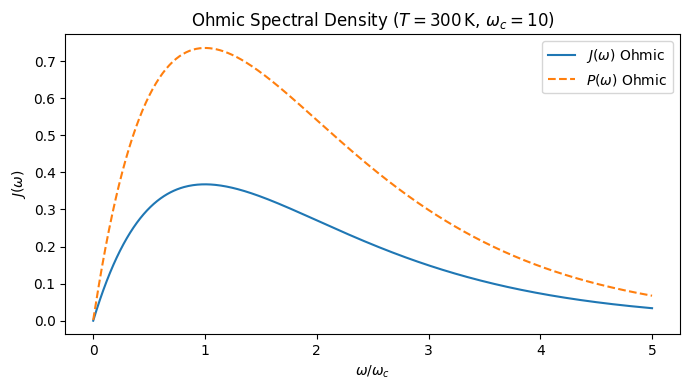

In [ ]:
def plot_energy_levels(omega_at, omega_cav, N_cav, N_at):
    """
    Plots the energy levels as a function of cavity frequency.

    Parameters:
    omega_at : float
        Atomic frequency.
    omega_cav : float
        Cavity frequency.
    g_at_cav : float
        Coupling strength between atom and cavity.
    N_cav : int
        Number of cavity levels.
    N_at : int
        Number of atomic levels.
    RWA_at_cav : bool
        Rotating wave approximation flag.
    """
    # Generate a range of frequencies around omega_at
    frequencies = np.linspace(-0.1 * omega_at, 0.1 * omega_at, 101)

    # Calculate Hamiltonians for each frequency
    H_list = [Hamilton(omega_at, omega_cav, N_cav, N_at) for wc in frequencies]

    # Calculate eigenenergies for each Hamiltonian
    eigenenergies = [H.eigenenergies() for H in H_list]

    # Plot the energy levels
    plt.figure(figsize=(5, 3))
    for i, energies in enumerate(zip(*eigenenergies)):
        plt.plot(frequencies / omega_at, np.array(energies) / omega_at,
                 label=f"Level {i+1}",
                 linestyle=['solid', 'dashed', 'dashdot', 'dotted'][i % 4],
                 color=f'C{i}')

    # Add labels and title
    plt.xlabel(r'Frequency $\omega_cav / \omega_at$')
    plt.ylabel(r'Energy $E / \omega_at$')
    plt.title(r"Energy Levels as a Function of $\omega_cav / \omega_at$")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [20]:
# for the HEOM solver:
max_depth = 2  # maximum hierarchy depth to retain
Nk = 2

envs = []
teminators = []

if "Relax_at" in decay_ops_strg:
    env_decay_at = DrudeLorentzBath(SX_op, lam=gamma_relax_at * cutoff / 2, gamma=cutoff, T=Temp, Nk=Nk) # decay
    _, terminator_decay_at = env_decay_at.terminator()
    envs.append(env_decay_at)
    teminators.append(terminator_decay_at)
if "Deph_at" in decay_ops_strg:
    env_deph_at = DrudeLorentzBath(SZ_op, lam=gamma_deph_at * cutoff / 2, gamma=cutoff, T=Temp, Nk=Nk) # deph
    _, terminator_deph_at = env_deph_at.terminator()
    envs.append(env_deph_at)
    teminators.append(terminator_deph_at)
if "Relax_cav" in decay_ops_strg:
    env_decay_cav = DrudeLorentzBath((A_op), lam=gamma_relax_cav * cutoff / 2, gamma=cutoff, T=Temp, Nk=Nk) # decay
    _, terminator_decay_cav = env_decay_cav.terminator()
    envs.append(env_decay_cav)
    teminators.append(terminator_decay_cav)
if "Deph_cav" in decay_ops_strg:
    env_deph_cav = DrudeLorentzBath(SZ_op, lam=gamma_deph_cav * cutoff / 2, gamma=cutoff, T=Temp, Nk=Nk) # deph
    _, terminator_deph_cav = env_deph_cav.terminator()
    envs.append(env_deph_cav)
    teminators.append(terminator_deph_cav)

if teminators:
    total_terminator = sum(teminators)
    L_total = liouvillian(H_total) + total_terminator
    
#            env_deph_at = DrudeLorentzBath(SZ_op, lam=gamma_deph_at * cutoff / 2, gamma=cutoff, T=Temp, Nk=Nk) # deph
#            _, terminator_deph_at = env_deph_at.terminator()
#            envs.append(env_deph_at)
#            terminators.append(terminator_deph_at)
#    #        a_ops_list.append(
#    #            [SZ_op, env_deph_at.spectral_density]  # Dephasing operator
#    #        )

[0, 0, 0, 0, 5.0]
[5.0]
t_{max} =  5.0
 Total run time: 276.71s*] Elapsed 276.71s / Remaining 00:00:00:00
 Total run time:  13.21s*] Elapsed 13.21s / Remaining 00:00:00:00***      15%           ] Elapsed 1.01s / Remaining 00:00:00:05[*********39%           ] Elapsed 2.95s / Remaining 00:00:00:04


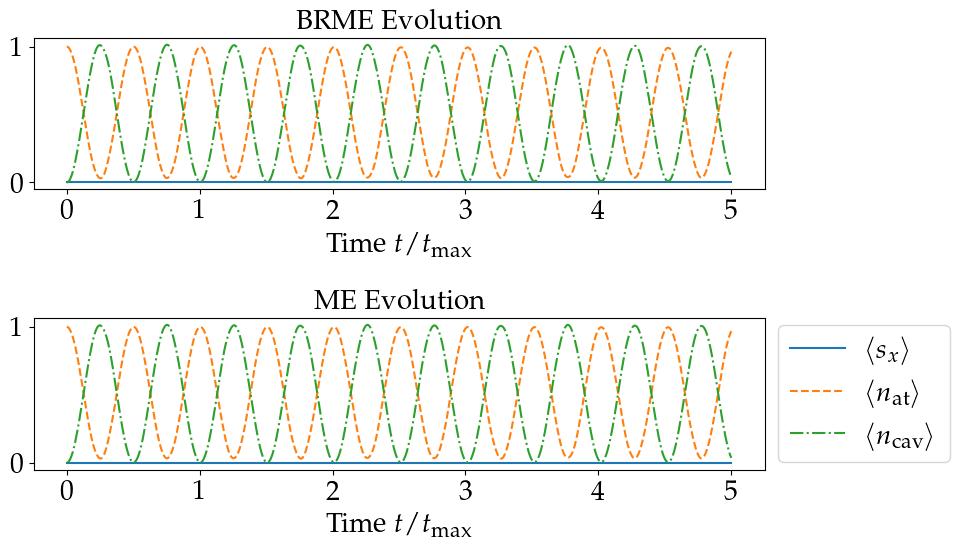

In [21]:
def define_t_max():
    t_max = t_prd_at = t_prd_cav = t_prd_at_cav = t_half_at = t_half_cav = 0

### Determine characteristic times based on the setup
    if g_at != 0:
        t_prd_at = 2 * np.pi / Rabi_at # Period of atomic Rabi oscillations
    if g_cav != 0:
        t_prd_cav = 2 * np.pi / Rabi_cav # Period of cavity Rabi oscillations

    if g_at_cav != 0:
        t_prd_at_cav = 2 * np.pi / Rabi_at_cav # Period of cavity Rabi oscillations

    if "Relax_at" in decay_ops_strg:
        t_half_at = 1 / (gamma_relax_at * ((2 * n_th_at) + 1)) # Half-life of atomic relaxation
    if "Relax_cav" in decay_ops_strg:
        t_half_cav = 1 / (gamma_relax_cav * ((2 * n_th_cav) + 1)) # Half-life of cavity relaxation

    all_times = [t_half_at, t_half_cav, t_prd_at, t_prd_cav, t_prd_at_cav]
    print(all_times)

### Clear selection of t_max based on the setup
    non_zero_values = [val for val in all_times if val > 0]
    print(non_zero_values)

    t_max = sum(non_zero_values) / len(non_zero_values) if non_zero_values else 0
    print("t_{max} = ", t_max)
    return t_max

t_max = define_t_max()
if t_max == 0: t_max = 1

solver_strg = ( # which solvers to use
    "brme",
    "me",
#    "heom"
)


### Define time arrays for evolution
times = np.linspace(0, 5 * t_max, 1000)

default_options = {
    "store_states": True,
    "progress_bar": "enhanced",
    "rtol": 1e-5,
    "atol": 1e-5,
    "nsteps": 15000, # ¿only? for heom?
    "method": "vern9", # ¿only? for heom?
}

### Compute the evolution based on the selected cases
result_brme = result_me = result_heom = None

if "brme" in solver_strg:
    result_brme = brmesolve(
        H_total,
        psi_ini,
        times,
        e_ops=e_ops_list,
        a_ops=a_ops_list,
        options=default_options,
    )

if "me" in solver_strg:
    result_me = mesolve(
        H_total,
        psi_ini,
        times,
        e_ops=e_ops_list,
        c_ops=c_ops_list,
        options=default_options,
    )

if "heom" in solver_strg:
    if not decay_ops_strg:
        pass  # Skip this "heom" part if no decay operators are specified
    else:
        # Define the HEOM solver with the provided environment and parameters
        HEOM_dlbath = HEOMSolver(
            L_total, 
            envs, 
            max_depth=max_depth, 
            options=default_options
        )
        
        # Run the HEOM solver and store the result
        result_heom = HEOM_dlbath.run(
            ket2dm(psi_ini), 
            times, 
            e_ops=e_ops_list
        )

# =============================
# PLOT EVOLUTION
# =============================
plt.figure(figsize=(10, 8))

### Plot result_brme if applicable
if result_brme:
    plt.subplot(3, 1, 1)
    for i, e_op in enumerate(e_ops_list):
        plt.plot(
            np.array(result_brme.times) / t_max,
            result_brme.expect[i],
            label=e_ops_labels[i],
            linestyle=['solid', 'dashed', 'dashdot', 'dotted'][i % 4],  # Alternate line styles
            color=f'C{i}',  # Use distinct colors
        )
    plt.xlabel(r'Time $t / t_{\text{max}}$')
    plt.title(r'BRME Evolution')

### Plot result_me if applicable
if result_me:
    plt.subplot(3, 1, 2)
    for i, e_op in enumerate(e_ops_list):
        plt.plot(
            np.array(result_me.times) / t_max,
            result_me.expect[i],
            label=e_ops_labels[i],
            linestyle=['solid', 'dashed', 'dashdot', 'dotted'][i % 4],  # Alternate line styles
            color=f'C{i}',  # Use distinct colors
        )
    plt.xlabel(r'Time $t / t_{\text{max}}$')
    plt.title(r'ME Evolution')

### Plot result_me if applicable
if result_heom:
    plt.subplot(3, 1, 3)
    for i, e_op in enumerate(e_ops_list):
        plt.plot(
            np.array(result_heom.times) / t_max,
            (result_heom.expect[i]),
            label=e_ops_labels[i],
            linestyle=['solid', 'dashed', 'dashdot', 'dotted'][i % 4],  # Alternate line styles
            color=f'C{i}',  # Use distinct colors
        )
    plt.xlabel(r'Time $t / t_{\text{max}}$')
    plt.title(r'HEOM Evolution')

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

In [ ]:
rho1, rho2 = result_brme.states[-1], result_me.states[-1]
F = fidelity(rho1, rho2)
print(f"Fidelity: {F}")

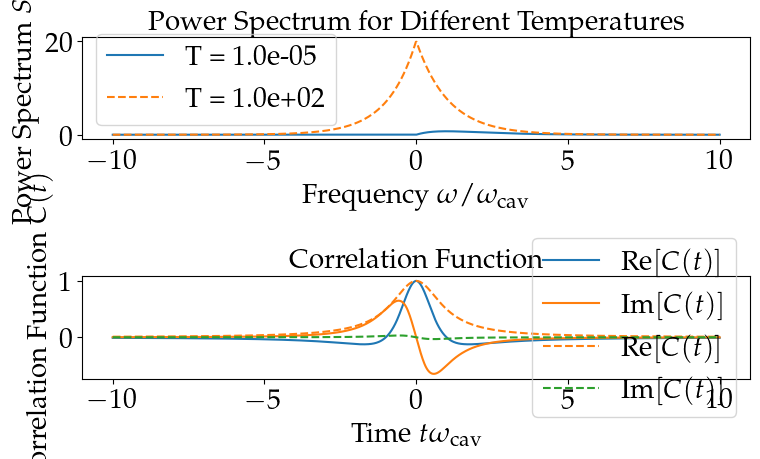

In [ ]:
# =============================
# PLOT BATH MODEL OVER FREQUENCIES AND TIMES
# =============================
cutoff, eta = 10, .1
temperatures = [1e-5, 1e2]
num_points   = 1000
frequencies  = np.linspace(-10 * cutoff, 10 * cutoff, num_points)  # Frequency range for the plot
times        = np.linspace(-10 / cutoff, 10 / cutoff, num_points)   # Time range for the plot
args = {"eta": eta, "cutoff": cutoff, "s": 1.0}
#args = {"lambda": eta * cutoff / 2, "cutoff": cutoff}

plt.figure(figsize=(8, 5))

### Plot power spectrum
plt.subplot(2, 1, 1)
for Temp in temperatures:
    # Update the bath model for the current temperature
    env = OhmicEnvironment.from_spectral_density(
        lambda w: spectral_density_func_ohmic(w, args),
        wMax=10 * cutoff,
        T=Temp
    )
    plt.plot(
        frequencies / cutoff,
        [env.power_spectrum(w) for w in frequencies],
        label=f"T = {Temp:.1e}",
        linestyle=['solid', 'dashed', 'dashdot', 'dotted'][temperatures.index(Temp) % 4],
        color=f'C{temperatures.index(Temp)}'
    )
plt.xlabel(r'Frequency $\omega / \omega_{\text{cav}}$')
plt.ylabel(r'Power Spectrum $S(\omega)$')
plt.title(r"Power Spectrum for Different Temperatures")
plt.legend()

### Plot correlation function
plt.subplot(2, 1, 2)
for Temp in temperatures:
    # Update the bath model for the current temperature
    env = OhmicEnvironment.from_spectral_density(
        lambda w: spectral_density_func_ohmic(w, args),
        wMax=10 * cutoff,
        T=Temp
    )
    correlation_vals = [env.correlation_function(t) for t in times] # Get correlation values
    max_abs_val       = np.max(np.abs(correlation_vals)) # Normalize by maximum absolute value
    plt.plot(
        times * cutoff,
        np.real(correlation_vals) / max_abs_val,
        label=r"$\mathrm{Re}[C(t)]$",
        linestyle=['solid', 'dashed', 'dashdot', 'dotted'][temperatures.index(Temp) % 4],
        color=f'C{temperatures.index(Temp)}'
    )
    plt.plot(
        times * cutoff,
        np.imag(correlation_vals) / max_abs_val,
        label=r"$\mathrm{Im}[C(t)]$",
        linestyle=['solid', 'dashed', 'dashdot', 'dotted'][temperatures.index(Temp) % 4],
        color=f'C{(temperatures.index(Temp) + 1) % 4}'
    )
#    plt.plot(
#        times * cutoff,
#        np.abs(correlation_vals) / max_abs_val,
##        label=r"$|C(t)|$",
#        linestyle=['solid', 'dashed', 'dashdot', 'dotted'][temperatures.index(Temp) % 4],
#        color=f'C{(temperatures.index(Temp) + 2) % 4}'
#    )
plt.xlabel(r'Time $t \omega_{\text{cav}}$')
plt.ylabel(r'Correlation Function $C(t)$')
plt.title(r"Correlation Function")
plt.legend(loc = "center right")

plt.tight_layout()
plt.show()

In [ ]:
#########SOME TEST approximate correlation fucntion baths to be used in heom
### Not used anymore, just for testing
 
#env = DrudeLorentzBath(SM_op, gamma_relax_at * cutoff / 2, cutoff, Temp, Nk)
#solver = HEOMSolver(H_total, env, max_depth=max_depth, options=default_options)


env = OhmicEnvironment(T=Temp, alpha=gamma_relax_at, wc=cutoff, s=1)
# Fit the correlation function with three exponential terms
times_fit = np.linspace(0, 3 / cutoff, 100)
approx_env, info = env.approx_by_cf_fit(times_fit, target_rsme=None, Nr_max=6, Ni_max=6, maxfev=1e6) # potentially add a guess

plt.plot(times_fit, np.real(env.correlation_function(times_fit)), label='Real part (analytic)')
plt.plot(times_fit, np.real(approx_env.correlation_function(times_fit)), '--', label='Real part (fit)')

plt.plot(times_fit, np.imag(env.correlation_function(times_fit)), label='Imag part (analytic)')
plt.plot(times_fit, np.imag(approx_env.correlation_function(times_fit)), '--', label='Imag part (fit)')

plt.xlabel('Time')
plt.ylabel('Correlation function')
plt.tight_layout()
plt.legend()

times_fit = np.linspace(0, 3 / cutoff, 200)
env_0 = env_2.approx_by_cf_fit(tlist=times_fit, Nr_max=20, full_ansatz=True, maxfev=10000)
#######################################################################################################################################################################
cf = [env_2.correlation_function(t) for t in times_fit]
plt.plot(times_fit, [c.real for c in cf], label="Re(CF)")
plt.plot(times_fit, [c.imag for c in cf], label="Im(CF)")
plt.legend()
plt.show()
#######################################################################################################################################################################
Nk = 2
lambda_ = gamma_relax_at
env_1 = DrudeLorentzBath(SX_op, lam=lambda_ * gamma_relax_at / 2, gamma=cutoff, T=Temp, Nk=Nk) # decay
# -> Problem: temperature is not added!
# -> Problem: gives totally absurd spectral_density
env_2 = OhmicEnvironment(T=Temp, alpha=gamma_relax_at, wc=cutoff, s=1)
env_3 = DrudeLorentzEnvironment(lam=lambda_ * gamma_relax_at / 2, gamma=cutoff, T=Temp, Nk=Nk) # decay
#env_1 = DrudeLorentzBath.from_environment(env_3, SX_op) # env_3 has to be a approximation!!!!!!!!!!!
#print(dir(env_1))
#print(vars(env_1))
#print(env_1.__dict__)

env_1.T = Temp

omega = np.linspace(-50, 50, 1000)
J1 = [env_1.power_spectrum(w) for w in omega]
J2 = [env_2.power_spectrum(w) for w in omega]
J3 = [env_3.power_spectrum(w) for w in omega]

#J = omega * 2 * lambda_ * cutoff / (cutoff**2 + omega**2)
#plt.plot(omega, J, "r", linewidth=2, label = "DL_eq")

plt.figure(figsize=(10, 8))

### Plot spectral densities
plt.plot(omega, J1 / np.max(np.abs(J1)), label=r"$J_1(\omega)$ (DL Bath)", linestyle='solid', color='C0')
plt.plot(omega, J2 / np.max(np.abs(J2)), label=r"$J_2(\omega)$ (Ohmic)", linestyle='dashed', color='C1')
plt.plot(omega, J3 / np.max(np.abs(J3)), label=r"$J_3(\omega)$ (DL Env)", linestyle='dashdot', color='C2')

plt.xlabel(r"Frequency $\omega$")
plt.ylabel(r"Spectral Density $J(\omega) / \max(J)$")
plt.title(r"Comparison of Spectral Densities")
plt.legend()
plt.tight_layout()
plt.show()
#######################################################################################################################################################################
env_decay_at = DrudeLorentzBath(SM_op + SM_op.dag(), lam=gamma_relax_at * cutoff / 2, gamma=cutoff, T=Temp, Nk=Nk) # decay
env_decay_at.T = Temp

a_ops_list = []

a_ops_list.append([
    SM_op + SM_op.dag(), 
    env_1.spectral_density
    ]  # Relaxation operator
)

result_brme = brmesolve(
    H0,
    psi_ini,
    times,
    a_ops=a_ops_list,
    options=opts  # Pass options here
)